In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive, files


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path on Google Drive
dataset_path = '/content/drive/MyDrive/New folder'  # Adjust path if necessary


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Initialize ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,         # Normalize pixel values
    validation_split=0.2,    # Split 20% for validation
    rotation_range=15,       # Augment: Rotate
    width_shift_range=0.1,   # Augment: Horizontal shift
    height_shift_range=0.1,  # Augment: Vertical shift
    shear_range=0.1,         # Augment: Shear
    zoom_range=0.1,          # Augment: Zoom
    horizontal_flip=True,    # Augment: Flip horizontally
    fill_mode='nearest'      # Fill missing pixels
)

# Create training data generator
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),   # Resize images
    batch_size=32,          # Number of images per batch
    class_mode='categorical',  # Multi-class classification
    subset='training'       # Training set
)

# Create validation data generator
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'     # Validation set
)

# Verify number of classes
num_classes = len(train_gen.class_indices)  # Automatically detects classes
print(f"Number of classes: {num_classes}")


Found 1050 images belonging to 14 classes.
Found 259 images belonging to 14 classes.
Number of classes: 14


In [ ]:
# Print the number of classes and class names
num_classes = len(train_gen.class_indices)  # Automatically detects classes
print(f"Number of classes: {num_classes}")
print(f"Class names: {train_gen.class_indices}")


Number of classes: 14
Class names: {'Aishwarya_Rai': 0, 'Ajay_Devgn': 1, 'Akshay_Kumar': 2, 'Alia_Bhatt': 3, 'Amitabh_Bachchan': 4, 'Deepika_Padukone': 5, 'Hrithik_Roshan': 6, 'John_Abraham': 7, 'Ranbir_Kapoor': 8, 'Saif_Ali_Khan': 9, 'Salman_Khan': 10, 'Sanjay_Dutt': 11, 'Shah_Rukh_Khan': 12, 'Shraddha_Kapoor': 13}


In [ ]:
# Define the CNN model
model = Sequential([
    # Convolutional and pooling layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(num_classes, activation='softmax')  # Output layer for 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 685,006 (2.61 MB)

 Trainable params: 685,006 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define callbacks for early stopping and saving the best model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_best_model.keras', save_best_only=True, monitor='val_loss')

In [ ]:
# Path to save/load model checkpoints
model_checkpoint_path = 'cnn_best_model.keras'

# Check for an existing model to resume training
if os.path.exists(model_checkpoint_path):
    model = tf.keras.models.load_model(model_checkpoint_path)
    print("Resuming training from the last checkpoint.")
else:
    print("Starting training from scratch.")

Resuming training from the last checkpoint.


In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=500,  # You can increase if needed
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 266ms/step - accuracy: 0.1073 - loss: 2.6399 - val_accuracy: 0.1004 - val_loss: 2.6248
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.1002 - loss: 2.6278 - val_accuracy: 0.1197 - val_loss: 2.6132
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.1053 - loss: 2.5997 - val_accuracy: 0.1467 - val_loss: 2.5744
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.1236 - loss: 2.5484 - val_accuracy: 0.1544 - val_loss: 2.4877
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.1640 - loss: 2.4669 - val_accuracy: 0.1622 - val_loss: 2.3949
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.1693 - loss: 2.4548 - val_accuracy: 0.1892 - val_loss: 2.3444
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.1751 - loss: 2.3818 - val_accuracy: 0.1892 - val_loss: 2.3474
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.2202 - loss: 2.2957 - va

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.4655 - loss: 1.5367
Validation Accuracy: 0.46


In [ ]:
# Save the final model
model.save('cnn_image_classifier.keras')


Saving images (4).jpeg to images (4) (10).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Akshay_Kumar with confidence 18.25%


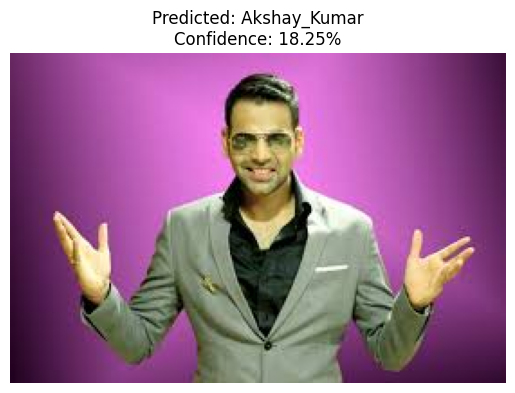

In [ ]:
def predict_image(model, img_path, class_indices):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Decode class
    class_labels = {v: k for k, v in class_indices.items()}
    decoded_class = class_labels[predicted_class]
    return decoded_class, confidence

# Test with uploaded images
uploaded = files.upload()
for img_path in uploaded.keys():
    predicted_class, confidence = predict_image(model, img_path, train_gen.class_indices)
    print(f"Predicted: {predicted_class} with confidence {confidence:.2f}%")

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()


In [ ]:
# Extract CNN features for all images in the dataset
dataset_features = []
image_paths = []

# Process all images in the dataset
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)
    if os.path.isdir(subdir_path):
        for img_name in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_name)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(64, 64))
            img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

            # Predict features using the trained model
            features = model.predict(img_array)
            dataset_features.append(features.flatten())  # Flatten the feature vector
            image_paths.append(img_path)

dataset_features = np.array(dataset_features)
print(f"Extracted features for {len(dataset_features)} images.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar(uploaded_features, dataset_features, image_paths):
    # Compute cosine similarity
    similarities = cosine_similarity(uploaded_features.reshape(1, -1), dataset_features)

    # Find the index of the most similar image
    most_similar_idx = np.argmax(similarities)
    similarity_score = similarities[0][most_similar_idx]

    # Return the most similar image path and its similarity score
    return image_paths[most_similar_idx], similarity_score


Saving 13.jpg to 13 (10).jpg
Saving 15.jpg to 15 (12).jpg
Saving alia900.jpg to alia900 (10).jpg
Saving images (4).jpeg to images (4) (11).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: Amitabh_Bachchan with confidence 48.28%


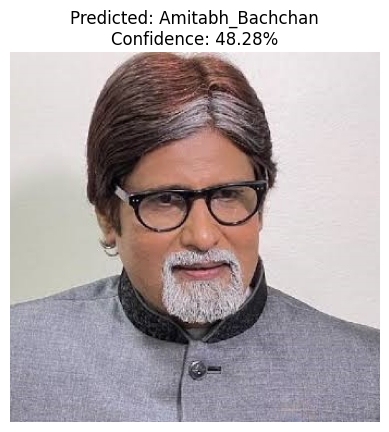

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Most Similar Image: /content/drive/MyDrive/New folder/Amitabh_Bachchan/Amitabh_Bachchan.64.jpg
Similarity Score: 0.98


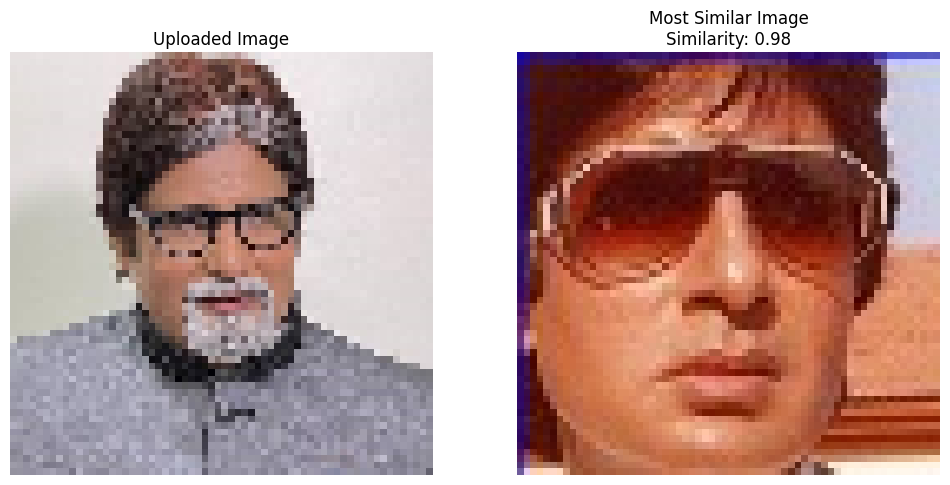

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted: Sanjay_Dutt with confidence 49.99%


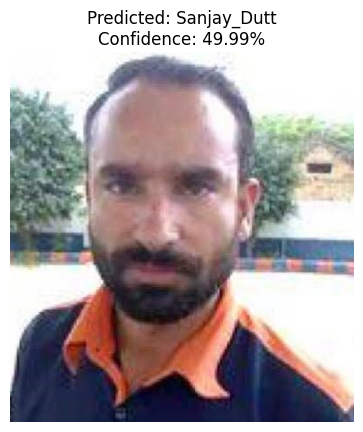

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Most Similar Image: /content/drive/MyDrive/New folder/Saif_Ali_Khan/Saif_Ali_Khan.117.jpg
Similarity Score: 0.98


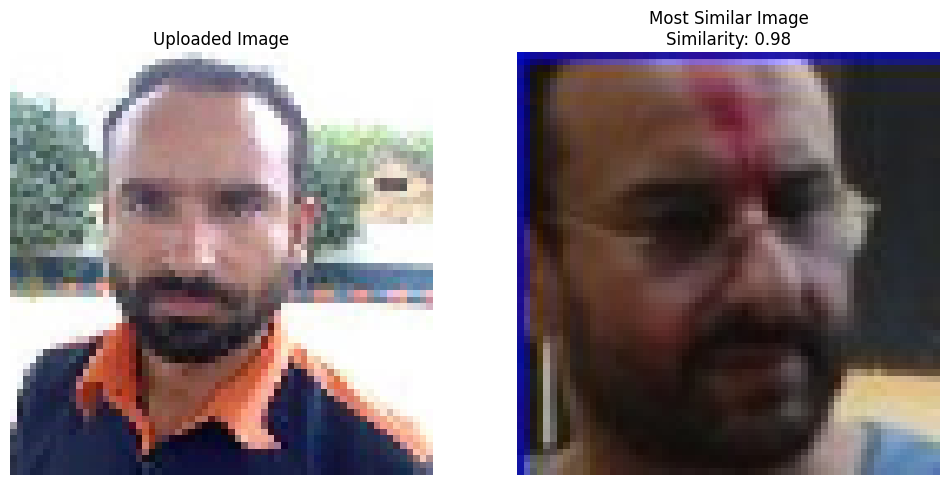

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: Alia_Bhatt with confidence 14.75%


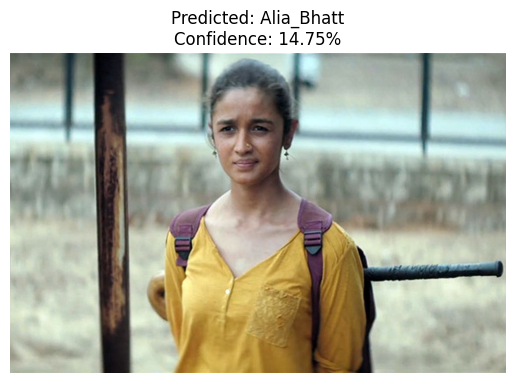

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Most Similar Image: /content/drive/MyDrive/New folder/Alia_Bhatt/Alia_Bhatt.143.jpg
Similarity Score: 0.89


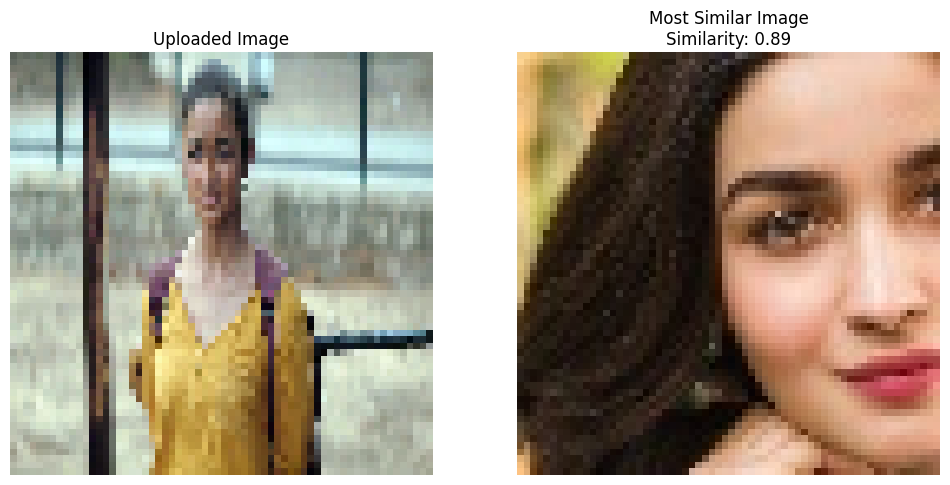

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: Akshay_Kumar with confidence 18.25%


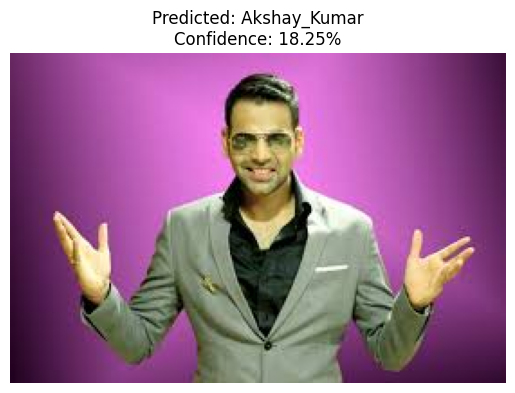

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Most Similar Image: /content/drive/MyDrive/New folder/Hrithik_Roshan/Hrithik_Roshan.153.jpg
Similarity Score: 0.96


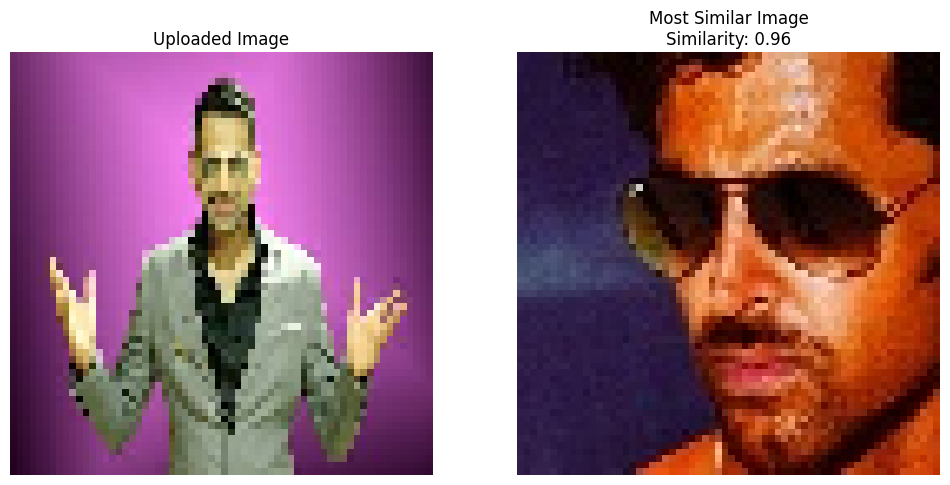

In [ ]:
# Test with uploaded images
uploaded = files.upload()

for img_path in uploaded.keys():
    # Predict class and confidence
    predicted_class, confidence = predict_image(model, img_path, train_gen.class_indices)
    print(f"Predicted: {predicted_class} with confidence {confidence:.2f}%")

    # Display the image with prediction
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    # Extract features for the uploaded image
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    uploaded_features = model.predict(img_array).flatten()

    # Find the most similar image
    most_similar_img_path, similarity_score = find_most_similar(
        uploaded_features, dataset_features, image_paths
    )

    # Print similarity results
    print(f"Most Similar Image: {most_similar_img_path}")
    print(f"Similarity Score: {similarity_score:.2f}")

    # Display the uploaded image and the most similar image
    most_similar_img = image.load_img(most_similar_img_path)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Uploaded image
    axes[0].imshow(img)
    axes[0].set_title("Uploaded Image")
    axes[0].axis('off')

    # Most similar image
    axes[1].imshow(most_similar_img)
    axes[1].set_title(f"Most Similar Image\nSimilarity: {similarity_score:.2f}")
    axes[1].axis('off')

    plt.show()
